<a href="https://colab.research.google.com/github/Kaiky-Student/Atividade-3---IA/blob/main/Atividade_3_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Bibliotecas

In [ ]:
pip install ucimlrepo

In [ ]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier #Adição do KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
import graphviz

import statsmodels.api as sm

#Coleta de dados


*   Fonte: https://archive.ics.uci.edu/dataset/45/heart+disease



In [ ]:
import os
import pandas as pd
from ucimlrepo import fetch_ucirepo

file_features  = '../data/pickle/heart_disease_features.pkl'
file_targets   = '../data/pickle/heart_disease_targets.pkl'

os.makedirs(os.path.dirname(file_features), exist_ok=True)

if not os.path.exists(file_features):
    # fetch dataset
    heart_disease = fetch_ucirepo(id=45)

    X = heart_disease.data.features
    X.to_pickle(file_features)
    print(f"Arquivo {file_features} foi gerado.")

    if not os.path.exists(file_targets):
        y = heart_disease.data.targets
        y.to_pickle(file_targets)
        print(f"Arquivo {file_targets} foi gerado.")

else:
    X = pd.read_pickle(file_features)
    print(f"Arquivo {file_features} carregado.")

    y = pd.read_pickle(file_targets)
    print(f"Arquivo {file_targets} carregado.")


features = X.columns
X.head()

Arquivo ../data/pickle/heart_disease_features.pkl carregado.
Arquivo ../data/pickle/heart_disease_targets.pkl carregado.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


#Tratamento dos dados (X)



*   Dados faltantes





In [ ]:
# Função para imputar a mediana nas colunas float
def impute_median_float(df):
    for col in df.select_dtypes(include='float'):
        median = df[col].median()
        df.loc[:,col] = df[col].fillna(median)

impute_median_float(X)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [ ]:
# Rescale the data
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

#Tratamento da classe (y)

In [ ]:
y.value_counts()

,count
num,
0,164
1,55
2,36
3,35
4,13


In [ ]:
# Atribua o valor 1 às classes 1, 2, 3 e 4
y = y.map(lambda x: 1 if x in [1, 2, 3, 4] else x)

# Verifique os valores únicos da classe
print(y.value_counts())

num
0      164
1      139
Name: count, dtype: int64


#Treinamento dos modelos e seleção do melhor

In [ ]:
# Dividir os dados em conjuntos de treinamento e teste (por exemplo, 80% para treinamento e 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Transformar y_train e y_test em vetores unidimensionais
y = y.values.ravel()
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [ ]:
# Defina os modelos que você deseja testar
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier() #KNN
}

# Defina os parâmetros que você deseja ajustar para cada modelo
parameters = {
    'Decision Tree': {'max_depth': [None, 2, 3, 4]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'SVM': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001]},
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'KNN': {'n_neighbors': [3, 5, 7]} #KNN
}

In [ ]:
best_model = None
best_score = 0

# Iterar sobre os modelos e parâmetros para encontrar o melhor modelo
for model_name, model in models.items():
    clf = GridSearchCV(model, parameters[model_name], cv=5)
    clf.fit(X_train, y_train)
    score = clf.best_score_
    print(f"{model_name}: {score}")

    if score > best_score:
        best_model = clf.best_estimator_
        best_score = score

# O melhor modelo e seus parâmetros
print("Melhor modelo:", best_model)

Decision Tree: 0.744047619047619
Random Forest: 0.8138605442176872
SVM: 0.8263605442176871
Logistic Regression: 0.8346938775510203
KNN: 0.8016156462585033
Melhor modelo: LogisticRegression(C=10)


#Avaliação do modelo

In [ ]:
# Faça previsões nos dados de teste
y_pred = best_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



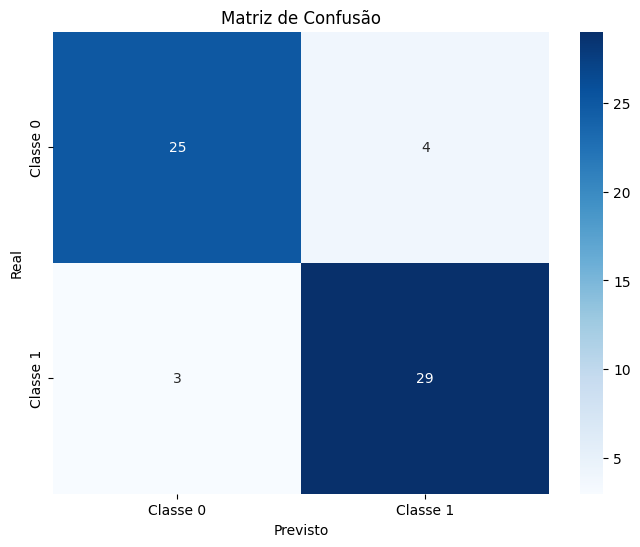

In [ ]:
# Calcule a matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels = [0, 1])

# Crie um heatmap da matriz de confusão usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

#Visualização do modelo de regressão logística

Optimization terminated successfully.
         Current function value: 0.344919
         Iterations 7


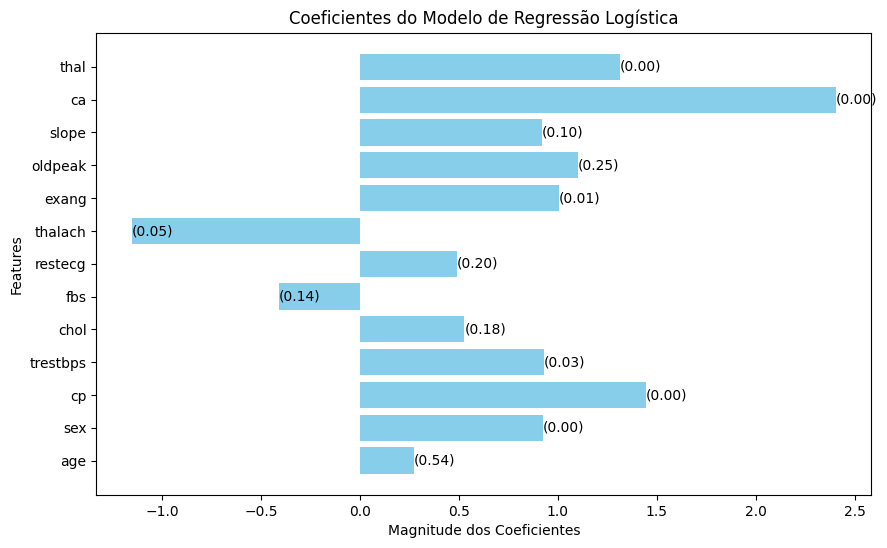

In [ ]:
clf = GridSearchCV(LogisticRegression(), parameters['Logistic Regression'], cv = 5)
clf.fit(X, y)

best_model = clf.best_estimator_
best_score = score

# Obtenha os coeficientes
coeficientes = best_model.coef_[0]

# Ajuste um modelo de regressão logística com statsmodels para calcular os p-values
log_reg_sm = sm.Logit(y, sm.add_constant(X))
result = log_reg_sm.fit()
p_values = result.pvalues[1:]

# Crie um gráfico de barras para visualizar os coeficientes e seus p-values
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(features, coeficientes, color='skyblue')

# Adicione a significância estatística aos coeficientes
for i, (coef, p_value) in enumerate(zip(coeficientes, p_values)):
    ax.text(coef, i, f'({p_value:.2f})', va='center')

ax.set_xlabel('Magnitude dos Coeficientes')
ax.set_ylabel('Features')
ax.set_title('Coeficientes do Modelo de Regressão Logística')
plt.show()

#Visualização do modelo de árvore de decisão

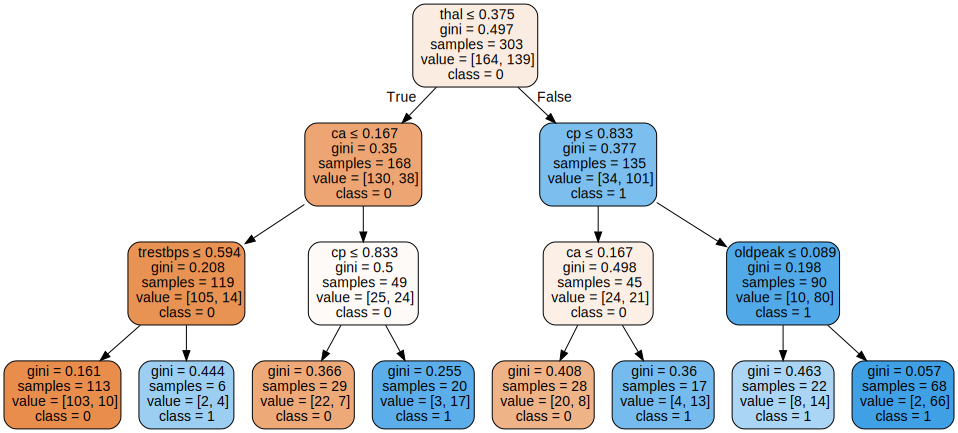

In [ ]:
clf = GridSearchCV(DecisionTreeClassifier(), parameters['Decision Tree'], cv = 5)
clf.fit(X, y)

best_model = clf.best_estimator_
best_score = score

def viewDecisionTree(model, column_names):
    '''Visualise the decision tree'''

    dot_data = tree.export_graphviz(model, out_file=None,
            feature_names=column_names,
            class_names=[str(classe) for classe in model.classes_],
            filled=True, rounded=True,
            special_characters=True)
    graph = graphviz.Source(dot_data)
    return graph


viewDecisionTree(best_model, features)